---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Umt_logo.png">

<h1 align="center">Department of Computer Science</h1>
<h1 align="center">Course: Machine Learning</h1>

---
<h3><div align="right">Instructor: Muhammad Tahir Sohail</div></h3>    
  

<h1 align="center">Lecture 15 (Multiple Linear Regression)</h1>

<a href="https://colab.research.google.com/github/arifpucit/data-science/blob/master/Section-3-Python-for-Data-Scientists/Lec-3.02(NumPy-02-Array-vs-List).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example (Simple Linear Regression using Matrices Algebra)

## *import libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!ls

advertising4D.csv  insurance.csv  sample_data  study-hours.csv


In [ ]:
!pwd

/content


# 1. Example (Multiple Linear Regression using OLS)
## a. Load Dataset

In [ ]:
df = pd.read_csv("study-hours.csv")
df

,study_hours,gpa
0,1.0,1.4
1,2.0,1.6
2,3.0,2.5
3,4.0,2.6
4,5.0,3.5
5,6.0,3.7
6,7.0,4.0


## b. Create X matrix and y Vector

In [ ]:
sh = np.array(df['study_hours'])
y = np.array(df['gpa'])
sh, y

(array([1., 2., 3., 4., 5., 6., 7.]),
 array([1.4, 1.6, 2.5, 2.6, 3.5, 3.7, 4. ]))

In [ ]:
sh = sh.reshape(sh.size, 1)
sh

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.]])

In [ ]:
X = np.hstack((np.ones((sh.size,1)), sh)) # stack arrays horizontally or columnX
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

## c. Calculate the Regression Coefficients

In [ ]:
beta = np.linalg.inv(X.T@X) @ X.T @y
#beta = np.linalg.pinv(X)@y
beta

array([0.9       , 0.46428571])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(sh, y) #Note that we have just passed the i/p feature as a column vect
print("Y-intercept (𝛽0): ", model.intercept_)
print("Slope (𝛽1): ", model.coef_)

Y-intercept (𝛽0):  0.8999999999999999
Slope (𝛽1):  [0.46428571]


## d. Carry out the Prediction
<ul><li>What will be the gpa if a student has studied for five hours daily.</li></ul>

In [ ]:
studyhours = 5.0
predicted_gpa = beta[0] + beta[1] * studyhours
print("Predicted GPA value for new study hours: {:.4f}".format(predicted_gpa))

Predicted GPA value for new study hours: 3.2214


In [ ]:
predicted_gpa = model.predict([[studyhours]])
print("Predicted GPA value for new study hours: {:.4f}".format(predicted_gpa[0]))

Predicted GPA value for new study hours: 3.2214


# 2. Example (Multiple Linear Regression using OLS)
## a. Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("advertising4D.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## b. Relationship between Output (Sales) and Feature Variables

<Axes: title={'center': 'Pearson Correlation Coefficient: 0.228'}, xlabel='newspaper', ylabel='sales'>

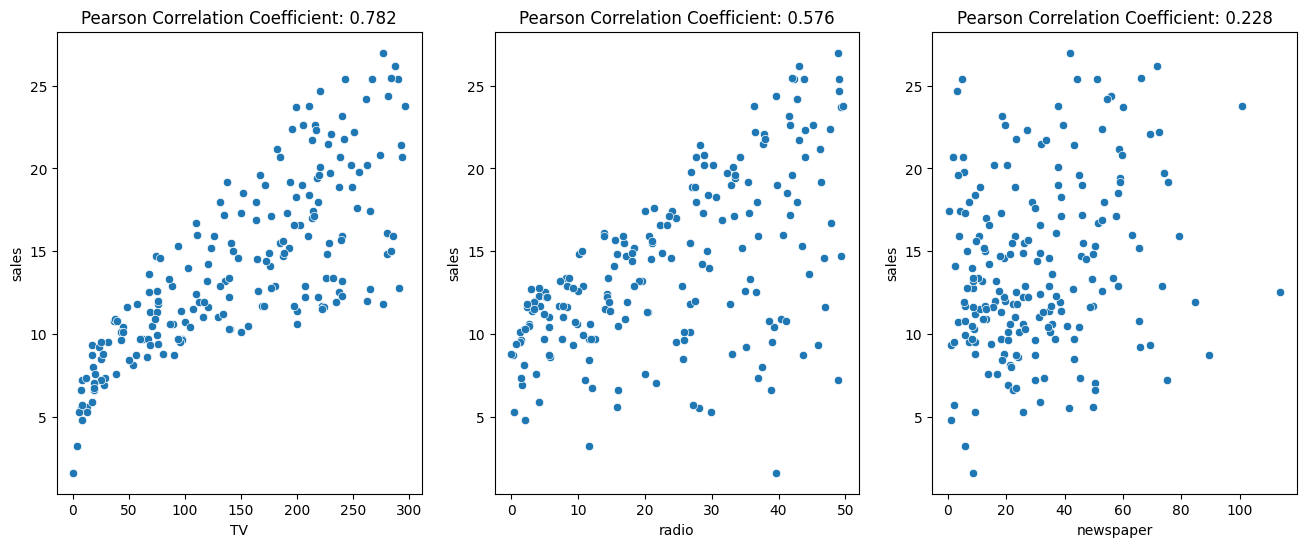

In [ ]:
tv = np.array(df['TV'])
radio = np.array(df['radio'])
newspaper = np.array(df['newspaper'])

x=tv
y = np.array(df['sales'])
numerator = sum(np.multiply(x - np.mean(x), y - np.mean(y)))
denominator = np.multiply((np.sqrt(np.sum((x-np.mean(x))**2))), np.sqrt(np.sum((y - np.mean(y))**2)))
corr_coef_tv = numerator / denominator

x=radio
y = np.array(df['sales'])
numerator = sum(np.multiply(x - np.mean(x), y - np.mean(y)))
denominator = np.multiply((np.sqrt(np.sum((x-np.mean(x))**2))), np.sqrt(np.sum((y - np.mean(y))**2)))
corr_coef_radio = numerator / denominator

x=newspaper
y = np.array(df['sales'])
numerator = sum(np.multiply(x - np.mean(x), y - np.mean(y)))
denominator = np.multiply((np.sqrt(np.sum((x-np.mean(x))**2))), np.sqrt(np.sum((y - np.mean(y))**2)))
corr_coef_newspaper = numerator / denominator

fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
ax1.set_title("Pearson Correlation Coefficient: {:.3f}".format(corr_coef_tv))
sns.scatterplot(x='TV', y='sales', data=df, ax=ax1)
ax2.set_title("Pearson Correlation Coefficient: {:.3f}".format(corr_coef_radio))
sns.scatterplot(x='radio', y='sales', data=df, ax=ax2)
ax3.set_title("Pearson Correlation Coefficient: {:.3f}".format(corr_coef_newspaper))
sns.scatterplot(x='newspaper', y='sales', data=df, ax=ax3)


## c. Create X matrix and y Vector

In [ ]:
y = np.array(df['sales'])
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [ ]:
features = np.array(df.drop("sales", axis=1))
features

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [ ]:
# We need to create a matrix X, with a column vector of ones appended on the left
X = np.insert(features, 0, 1, axis=1)
X

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [ ]:
rows = df['radio'].shape[0]
ones = np.ones([rows, 1]) # specify number of rows and columns as a list
X = np.hstack((ones, features))
X

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

## d. Calculate the Regression Coefficients

In [ ]:
X.T@X # np.dot(X.T, X)

array([[2.00000000e+02, 2.94085000e+04, 4.65280000e+03, 6.11080000e+03],
       [2.94085000e+04, 5.79111839e+06, 6.98061980e+05, 9.19625280e+05],
       [4.65280000e+03, 6.98061980e+05, 1.52107860e+05, 1.64946550e+05],
       [6.11080000e+03, 9.19625280e+05, 1.64946550e+05, 2.81096740e+05]])

In [ ]:
np.linalg.inv(X.T@X)

array([[ 3.42444998e-02, -9.35348333e-05, -3.92647297e-04,
        -2.08036831e-04],
       [-9.35348333e-05,  6.84890750e-07, -1.57355890e-07,
        -1.14959987e-07],
       [-3.92647297e-04, -1.57355890e-07,  2.61016474e-05,
        -6.26574016e-06],
       [-2.08036831e-04, -1.14959987e-07, -6.26574016e-06,
         1.21328472e-05]])

In [ ]:
X.T@y

array([  2804.5 , 482108.34,  74126.39,  90851.03])

In [ ]:
betas = np.linalg.inv(X.T@X) @ X.T@y
print("Beta0: {:.3f}, Beta1: {:.3f}, Beta2: {:.3f}, Beta3: {:.3f}".format(betas[0], betas[1], betas[2], betas[3]))

Beta0: 2.939, Beta1: 0.046, Beta2: 0.189, Beta3: -0.001


## e. Carry out the Prediction

In [ ]:
tv=180
radio=10
newspaper=58
pred_y = betas[0] + betas[1] * tv + betas[2] * radio + betas[3] * newspaper
print("Predicted Sales value for input features: {:.3f}".format(pred_y))


Predicted Sales value for input features: 13.002


# 3. Evaluate the Model

In [ ]:
ybar = np.mean(y)
yhat = betas[0] + betas[1]*df['TV'] + betas[2]*df['radio'] + betas[3] * df['newspaper']
mae = (np.sum(abs(y - yhat)))/len(y)
mse = (np.sum((y - yhat)**2))/len(y)
rmse = np.sqrt((np.sum((y - yhat)**2))/len(y))
print("MAE: {:.3f}".format(mae))
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))


MAE: 1.252
MSE: 2.784
RMSE: 1.669


In [ ]:
ybar = np.mean(y)
sse = np.sum((y - yhat)**2)
sst = np.sum((y - ybar)**2)
r2 = 1 - (sse/sst)
print("R2 Score: {:.4f}".format(r2))

# Task To Do
# Assignment # 6

In [4]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# Label Encoding (Manual)

In [5]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])          # male=1, female=0
df['smoker'] = le_smoker.fit_transform(df['smoker']) # yes=1, no=0
df['region'] = le_region.fit_transform(df['region']) # regions as numbers
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


# **Prepare X and y**

In [8]:
y = np.array(df['expenses'])  # target
features = np.array(df.drop("expenses", axis=1))  # all other columns

# Add bias (intercept)
rows = df.shape[0]
ones = np.ones([rows, 1])
X = np.hstack((ones, features))


# Manual Linear Regression

In [9]:
# Beta = (XᵀX)^-1 Xᵀy
betas = np.linalg.inv(X.T @ X) @ X.T @ y

# Print coefficients
for i, b in enumerate(betas):
    print(f"Beta{i}: {b:.3f}")


Beta0: -11818.023
Beta1: 257.272
Beta2: -131.146
Beta3: 332.645
Beta4: 479.565
Beta5: 23819.322
Beta6: -353.485


# **Make a prediction**

In [10]:
# Input: age=30, sex=1, bmi=25.5, children=1, smoker=0, region=1
input_features = np.array([1, 30, 1, 25.5, 1, 0, 1])
pred_manual = input_features @ betas
print("Predicted expenses (manual): {:.2f}".format(pred_manual))


Predicted expenses (manual): 4377.53


# **Evaluation Metrics (MAE, MSE, RMSE)**

In [18]:
yhat = X @ betas
mae = np.mean(np.abs(y - yhat))
mse = np.mean((y - yhat) ** 2)
rmse = np.sqrt(mse)

print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))



MAE: 4172.25
MSE: 36525536.87
RMSE: 6043.64


# **R² Score**

In [ ]:
ybar = np.mean(y)
sst = np.sum((y - ybar)**2)
sse = np.sum((y - yhat)**2)
r2 = 1 - (sse / sst)
print("R2 Score (manual): {:.4f}".format(r2))


R2 Score (manual): 0.7508


# **Model-Based Linear Regression using scikit-learn**

# Import model libraries

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Train Model

In [14]:
X_model = df.drop("expenses", axis=1)
y_model = df["expenses"]

model = LinearRegression()
model.fit(X_model, y_model)


LinearRegression()

# Predict using model

In [16]:
# Make sure model is trained on the same order of columns
model_input = np.array([[30, 1, 25.5, 1, 0, 1]])  # 6 features
pred_model = model.predict(model_input)
print("Predicted expenses (model): {:.2f}".format(pred_model[0]))



Predicted expenses (model): 4377.53


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model Metrics

In [17]:
y_pred = model.predict(X_model)

mae = mean_absolute_error(y_model, y_pred)
mse = mean_squared_error(y_model, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_model, y_pred)

print("MAE: {:.2f}".format(mae))
print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("R2 Score (model): {:.4f}".format(r2))


MAE: 4172.25
MSE: 36525536.87
RMSE: 6043.64
R2 Score (model): 0.7508
